In [ ]:
#############################################################################
# File: DS312_Project1_RachelNewman
# Author: Rachel Newman
# Purpose: Perform simple Linear Regression and calculate MAE for test data.
# Resources: Collaborated with Jerome Busquin for majority of Project 1. We 
#            worked on Problem 2, Problem 3, and Problem 4 together, but 
#            Problem 1 and Problem 5 are my own work.
############################################################################

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 

# Question 1: Theoretical Foundations of Linear Regression

Please see pdf submitted on Canvas for solution to Question 1. I wrote it out by hand and submitted it that way!

# Question 2: Calculation Using Provided Datasets

### You are provided with two CSV files: one for the training set and one for the test set. Each file contains two columns: "MedInc" (Median Income) which is your x and "PRICE" (Median House Value) which is your y. These datasets are part of the California Housing Price data.

In [8]:
## need to upload training and testing data as two pandas dataframes
train = pd.read_csv('/Users/rachi/OneDrive - Embry-Riddle Aeronautical University/JupyterNotebook/DS 312/Project 1/Training_Set.csv')

## looking at the first 10 entries in the dataframe
train.head(10)

,MedInc,PRICE
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611


In [9]:
## looking at summary of data 
train.describe()

,MedInc,PRICE
count,20635.000000,20635.000000
mean,3.871121,2.068855
std,1.899822,1.153938
min,0.499900,0.149990
25%,2.564300,1.197500
50%,3.535200,1.797000
75%,4.743700,2.648500
max,15.000100,5.000010


In [22]:
## uploading the testing set 
test = pd.read_csv('/Users/rachi/OneDrive - Embry-Riddle Aeronautical University/JupyterNotebook/DS 312/Project 1/Test_Set.csv')
test.head()

,MedInc,PRICE
0,1.5603,0.781
1,2.5568,0.771
2,1.7000,0.923
3,1.8672,0.847
4,2.3886,0.894


In [24]:
## understanding the test data
test.describe()

,MedInc,PRICE
count,5.000000,5.000000
mean,2.014580,0.843200
std,0.436161,0.067165
min,1.560300,0.771000
25%,1.700000,0.781000
50%,1.867200,0.847000
75%,2.388600,0.894000
max,2.556800,0.923000


#### 1. Calculating Parameters: Using the training set, calculate b bar and m bar using the formulas derived in Question 1.

In [ ]:
## I am not sure how to calculate b_bar or m_bar.

In [111]:
# extracting the x (MedInc) and y (Price) from the training dataset
x_train = train['MedInc']
y_train = train['PRICE']

# extracting the x (MedInc) and y (Price) from the testing dataset
x_test = test['MedInc']
y_test = test['PRICE']

In [122]:
## number of data points
N = len(x_train)

## calculations for 𝑥̅ , 𝑦̅ , 𝑥𝑦̅̅̅ , and 𝑥2̅̅̅  
x_bar = (1/N)*np.sum(x_train)
y_bar = (1/N)*np.sum(y_train)
xy_bar = (1/N)*np.sum(x_train*y_train)
x_square_bar = (1/N)*np.sum(x_train**2)

In [124]:
## calculating the slope (𝑚̂)
m_hat = (xy_bar - (x_bar*y_bar))/(x_square_bar - (x_bar**2))

In [132]:
## calculating the intercept (𝑏̂)
b_hat = y_bar - (m_hat*x_bar)

In [130]:
print(f'Slope(𝑚̂): {m_hat}')
print(f'Intercept(𝑏̂): {b_hat}')

Slope(𝑚̂): 0.4178869556191133
Intercept(𝑏̂): 0.4511642181500659


#### 2. Predictions and MAE: Use the computed values of 𝑏̂ and 𝑚̂ to make predictions on the test set to calculate the Mean Absolute Error (MAE) between the predicted and actual values.

In [117]:
## making predictions on the test set using the linear model
y_pred = (m_hat*x_test) + b_hat
print(f'The predicted y-values for the test set are: {y_pred}')

The predicted y-values for the test set are: 0    1.103193
1    1.519618
2    1.161572
3    1.231443
4    1.449329
Name: MedInc, dtype: float64


In [119]:
## calculating the MAE
mae = np.mean(np.abs(y_test - y_pred))
print(f'Mean Absolute Error (MAE) is: {mae}')

Mean Absolute Error (MAE) is: 0.44983092120121915


# Question 3: Implement Simple Linear Regression using Gradient Descent from Scratch

#### 1. Manual Implementation: Implement a simple linear regression model using gradient descent from scratch using the training data. Use this model to make predictions on the test data.

In [75]:
## extracting feature (x) and target (y) from dataset
x_Train = train['MedInc']
y_Train = train['PRICE']
x_Test = test['MedInc']
y_Test = test['PRICE']

In [59]:
n = 1000 ## number of iterations for model

In [93]:
## initializing parameters needed for Gradient Descent

m = 0 ## initial slope
b = 0 ## initial intercept
alpha = 0.01 ## learning rate for the model 
N = len(x_Train)

for n in range(n):
    ## calculating predictions with current m and b
    y_preds_train = m*x_Train + b
    ## calculating partial derivatives of m and b
    deriv_m = -(2/N)*np.sum(x_Train*(y_Train - y_preds_train)) ## derivative with respect to m
    deriv_b = -(2/N)*np.sum(y_Train - y_preds_train) ## derivative with respect to b
    ## updating m and b using gradient descent
    m = m - (alpha*deriv_m)
    b = b - (alpha*deriv_b)

## use learned parameters to make predictions on test data
y_preds_test = m*x_Test + b

print(f'The predicted y_values for the test data are: {y_preds_test}')

The predicted y_values for the test data are: 0    1.097435
1    1.515655
2    1.156066
3    1.226238
4    1.445064
Name: MedInc, dtype: float64


In [95]:
## actual values of test data
print(f'The actual y_values for the test data are: {y_Test}')

The actual y_values for the test data are: 0    0.781
1    0.771
2    0.923
3    0.847
4    0.894
Name: PRICE, dtype: float64


#### 2. Calculate MAE: Compute the Mean Absolute Error (MAE) of your predictions on the test set.

In [102]:
## calculating the MAE for the test data manually
MAE = np.mean(np.abs(y_Test - y_preds_test))
print(f'The MAE on the test set is: {MAE}')

The MAE on the test set is: 0.44489156606324853


# Question 4: Linear Regression Using Scikit-Learn

#### 1. Library Implementation: Implement a simple linear regression model using the scikit-learn library on the training set.

In [28]:
## extracting the features from the train and test sets
X_train = train[['MedInc']] # feature for predictions
y_train = train['PRICE'] # target variable for train set

X_test = test[['MedInc']] # test feature
y_test = test['PRICE'] # test target variable

In [30]:
## train/build the linear regression model with scikit-learn
linear_model = LinearRegression()
linear_model.fit(X_train.values.reshape(-1,1), y_train) # training the model on the training data

LinearRegression()

In [32]:
## model accuracy on the training set
train_score = linear_model.score(X_train.values.reshape(-1,1), y_train)
print(f'Accuracy of linear model on training data: {train_score}')

Accuracy of linear model on training data: 0.47334606890246067


#### 2. Predict and Compute MAE: Use this model to make predictions on the test set and calculate the MAE.

In [90]:
## using the trained model to make predictions on the test set
y_pred_train = linear_model.predict(X_train.values.reshape(-1,1))
y_pred_test = linear_model.predict(X_test.values.reshape(-1,1))

In [88]:
## calculating the Mean Absolute Error (MAE) with scikit-learn
MAE_train = mean_absolute_error(y_train, y_pred_train)
print(f'The Mean Absolute Error (MAE) for the training data is: {MAE_train}')
MAE_test = mean_absolute_error(y_test, y_pred_test)
print(f'The Mean Absolute Error (MAE for the test data is {MAE_test}')

The Mean Absolute Error (MAE) for the training data is: 0.6263287187706615
The Mean Absolute Error (MAE for the test data is 0.4498309212012197


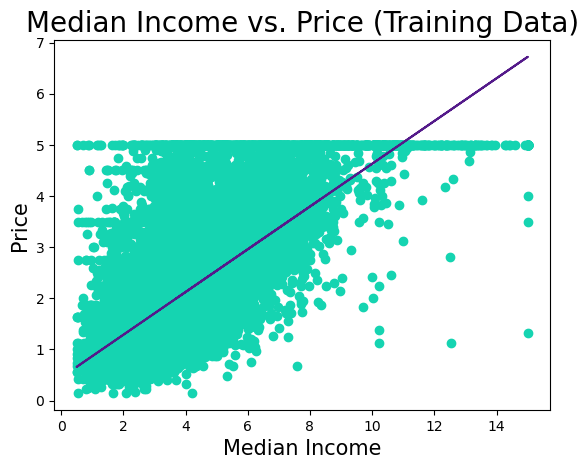

In [38]:
## plotting a scatter plot to understand the training data
plt.figure()
plt.scatter(X_train, y_train, color ='#15d4b1')
plt.plot(X_train, y_pred_train, color ='#541a8a')
plt.xlabel('Median Income', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Median Income vs. Price (Training Data)', fontsize = 20)
plt.show()

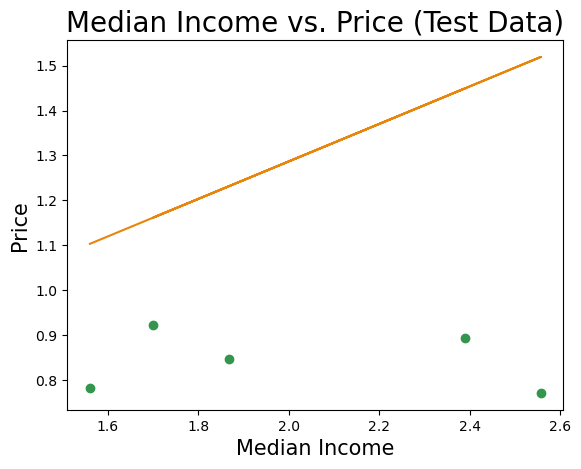

In [107]:
## creating a plot to understand the model on the test data
plt.figure()
plt.scatter(X_test, y_test, color = '#33964c')
plt.plot(X_test, y_pred_test, color = '#e8850c')
plt.xlabel('Median Income', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Median Income vs. Price (Test Data)', fontsize = 20)
plt.show()

# Question 5: Comparative Analysis

### Compare the MAE from the manual implementation (Question 2, 3) with the scikit-learn implementation (Question 4). Discuss which model has the  lower MAE and why this might be the case. 

For my calculations, I got a MAE of 0.4498 for Question 2, a MAE of 0.44489 for Question 3, and a MAE of 0.4498 for Question 4 for the test data. My calculations for the MAE were almost identical for all three questions, but Question 3's MAE is lower (by one decimal place). The reason the Gradient Descent may have a lower MAE due to several factors, including the learning rate and the number of iterations (or how many times the model is run). If the learning rate is too high, the gradient descent may overshoot and fail to converge, whereas if the learning rate is too low, the model may converge very slowly. If there are an insufficient number of iterations that the model is run, it may result in a model that hasn't fully converged to the optimal values of m and b. For Question 2 and Question 4, the manual calculations are done to optimize the slope (m) and intercept (b) by using the least squares formula, and the scikit-learn model uses the same method. 